# k-nearest neighbors (KNN) algorithm on the famous "penguins" dataset
The dataset is often used for classification and clustering tasks. Below is a description of the columns in the penguins dataset:

1. species: The species of the penguin (e.g., Adelie, Chinstrap, Gentoo). This column represents the target variable in classification tasks.

2. island: The island where the penguin was observed (e.g., Biscoe, Dream, Torgersen).

3. culmen_length_mm: The length of the penguin's culmen (bill) in millimeters.

4. culmen_depth_mm: The depth of the penguin's culmen (bill) in millimeters.

5. flipper_length_mm: The length of the penguin's flipper in millimeters.

6. body_mass_g: The body mass of the penguin in grams.

7. sex: The gender of the penguin (male, female).

The dataset is often used for species classification based on the physical measurements of the penguins



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:

penguins_data=sns.load_dataset("penguins")

In [4]:
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
penguins_data.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


## Handle missing values

In [6]:
penguins_data.dropna(inplace=True)

In [7]:
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [8]:
penguins_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [9]:
penguins_data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [10]:
print(penguins_data.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


## EDA

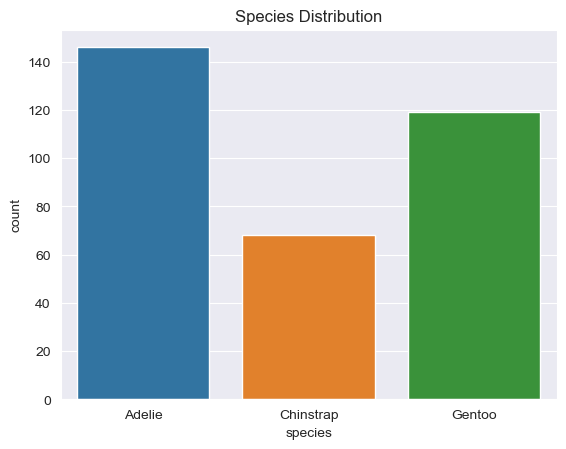

In [11]:
sns.countplot(x='species', data=penguins_data)
plt.title("Species Distribution")
plt.show()

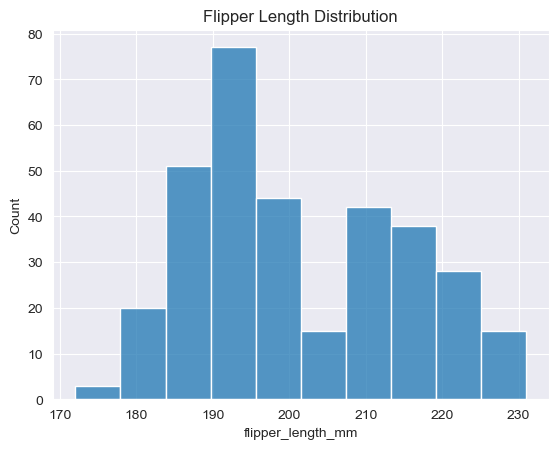

In [12]:
sns.histplot(data=penguins_data, x='flipper_length_mm')
plt.title("Flipper Length Distribution")
plt.show()

<Figure size 600x400 with 0 Axes>

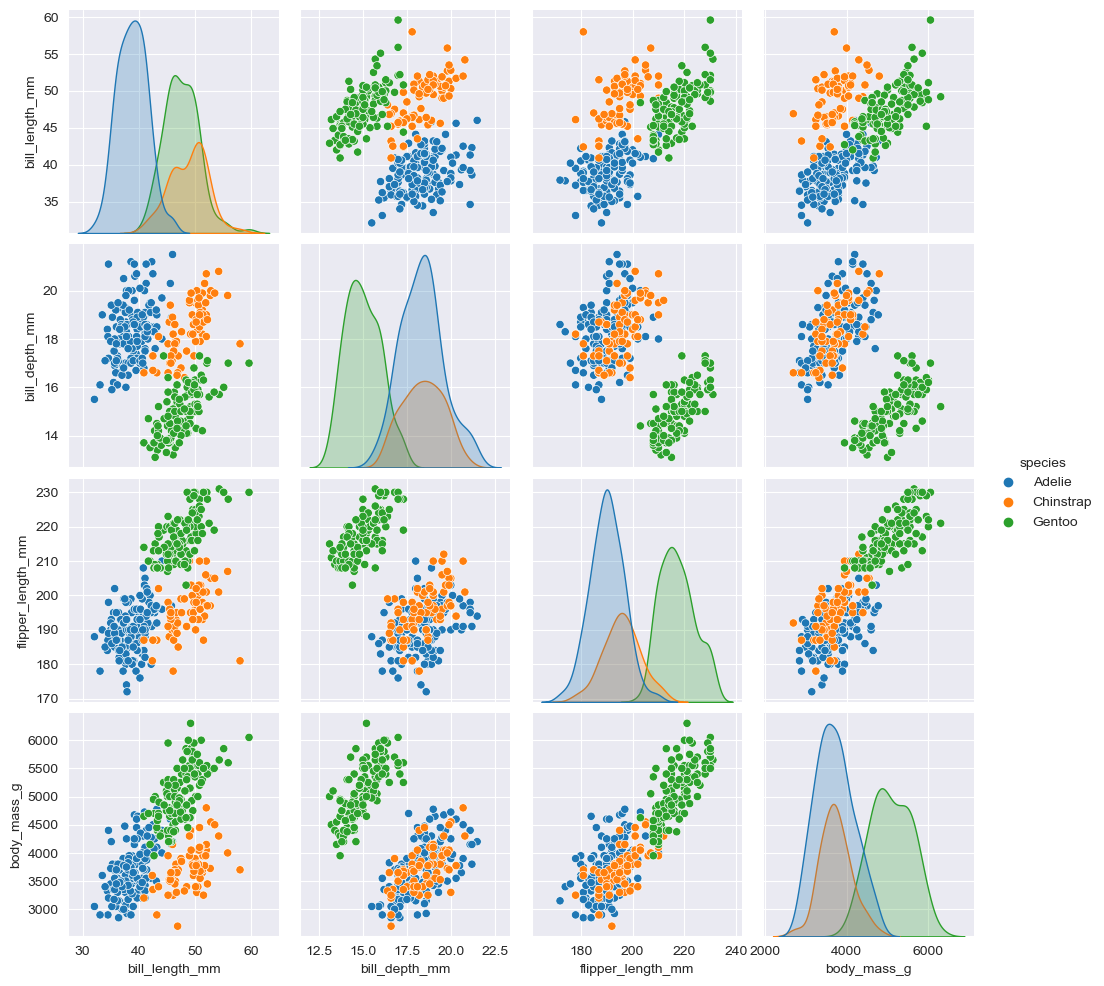

In [13]:
plt.figure(figsize=[6,4])
sns.pairplot(penguins_data, hue='species')


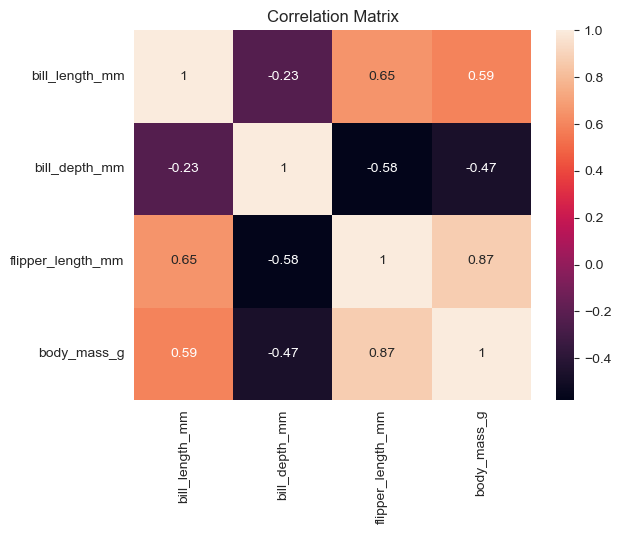

In [14]:
correlation_matrix = penguins_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

## Categorical values to the numerical values

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


In [34]:
label_encoder = LabelEncoder()
penguins_data['species_encoded'] = label_encoder.fit_transform(penguins_data['species'])

In [35]:
penguins_data.drop(columns=['species', 'island', 'sex'], inplace=True)

In [36]:
X = penguins_data.drop(columns=['species_encoded'])
y = penguins_data['species_encoded']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [39]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
predictions = knn_classifier.predict(X_test)

## Evaluation

In [41]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, predictions))

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8059701492537313
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        31
           1       0.67      0.46      0.55        13
           2       0.91      0.91      0.91        23

    accuracy                           0.81        67
   macro avg       0.78      0.75      0.76        67
weighted avg       0.80      0.81      0.80        67

Confusion Matrix:
[[27  2  2]
 [ 7  6  0]
 [ 1  1 21]]
